# Types of Features
**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

||||
|---|---|---|
1.| Edges:| Area of high intensity gradient, Intensity abruptly changes at the edge|
||||
2.| Corners:| Intersectionof two edges|
||||
3.| Blobs:| Region based features- include areas of extream high and low areas of intensity|
||||

In [2]:
# lib import
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [8]:
# image import
img = cv2.imread('images/waffle.jpg')

In [21]:
# Function to
'''    px_sq_size - is the size of square used to detect corner - use smaller value if corners are visible
    1. sobel_kernel- size 
    2. constant - low value - more corners detected
    corner_detected_image contains detected corners'''
def Corner_detect(img,px_sq_size,sobel_kernel_size,constant):
#     Make a copy of that image
    image = np.copy(img)
#     save rgb and grayscale images
    rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     convert 
#     gray = np.float32(gray)
    corner_detected_image = cv2.cornerHarris(gray,px_sq_size,sobel_kernel_size,constant)
    dilated_corner_detected_image = cv2.dilate(corner_detected_image,None)  # none implies keep the default dilation size

    
#     dilate function makes the corner more visible
#     Set a thresold to detect the strongest corner
    thresh = 0.1*dilated_corner_detected_image.max() #less thresh- more corners
    corner_img = np.copy(rgb)
    
    for i in range(0,dilated_corner_detected_image.shape[0]):
        for j in range(0,dilated_corner_detected_image.shape[1]):
            if(dilated_corner_detected_image[i,j]>thresh):# if above threshold we will mark that point
                cv2.circle(rgb,(j,i),1,(255,0,0),1)
    plt.imshow(rgb)
                
    


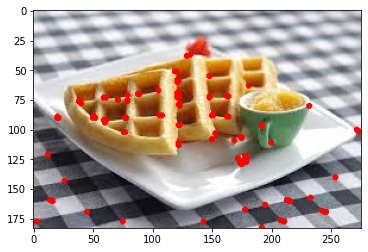

In [22]:
Corner_detect(img,2,3,0.04)